# Test calculate_percentile_baseline

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from janelia_core.dataprocessing.baseline import percentile_filter_multi_d

## Simple 1-d example to test write offset

In [43]:
x = np.asarray([[0,0,0,0,0, 1, 1, 1, 1, 1]])
x = x.transpose()
y = percentile_filter_multi_d(data=x, window_length=3, filter_start=-1, write_offset=1, p=.4)

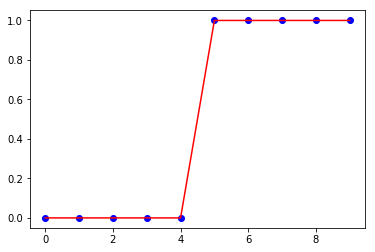

In [44]:
plt.plot(x[:,0], 'bo')
plt.plot(y[:,0], 'r-')

## 2-d example to test mask

In [37]:
d_shape = [10, 10]
n_smps = 100
mask = np.zeros(d_shape, dtype=np.bool)
mask[2:8, 2:8] = True

data = np.random.randn(n_smps, *d_shape)

p = percentile_filter_multi_d(data, window_length=3, filter_start=-1, write_offset = 1, 
                              p=.05, n_processes=1, mask=mask)

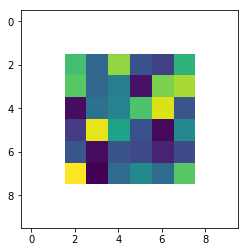

In [38]:
plt.imshow(p[0,:,:])

## Larger example to test timing

In [57]:
d_shape = [2000, 100]
n_smps = 10000

In [58]:
data = np.random.randn(n_smps, *d_shape)

In [59]:
t0 = time()
p = percentile_filter_multi_d(data, window_length=2001, filter_start=-1000, write_offset = 1000, 
                              p=.05, n_processes=40)
t1 = time()
print('Elapsed time: ' + str(t1 - t0))

Elapsed time: 1581.56973695755
